In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib
import matplotlib.pyplot as plt

In [37]:
df = dd.read_csv('data/*.csv')
dfBrooklyn1 = df[df['name'] == 'Brooklyn Bridge Bike Path']
dfBrooklyn2 = df[df['name'] == 'Brooklyn Bridge Bicycle Path (Roadway)']
dfBrooklyn = dd.concat([dfBrooklyn1, dfBrooklyn2])
dfBrooklyn['date'] = dd.to_datetime(dfBrooklyn['date'])
dfBrooklyn['year-month'] = dfBrooklyn['date'].dt.to_period('M')
dfBrooklyn['date'] = dfBrooklyn['date'].dt.date
dailyDataBrooklyn = dfBrooklyn.groupby(['date']).agg({'counts':'sum'}).compute()


In [38]:
dailyDataBrooklyn


,counts
date,
2013-12-19,595.0
2013-12-20,1170.0
2013-12-21,1075.0
2013-12-22,741.0
2013-12-23,326.0
...,...
2021-10-27,3368.0
2021-10-28,4003.0
2021-10-29,2621.0


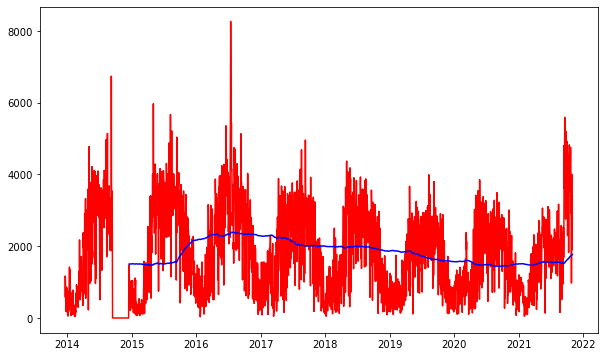

In [39]:
plt.figure(figsize = (10,6))
plt.plot(dailyDataBrooklyn.index,dailyDataBrooklyn.counts, label = 'count', color = 'red')
plt.plot(dailyDataBrooklyn.index,dailyDataBrooklyn.counts.rolling(window = 365).mean(), label = 'count', color = 'blue')

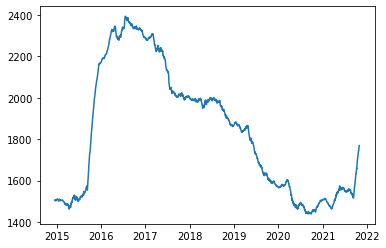

In [40]:
#1449 days is when the bike lanes was completed
plt.plot(dailyDataBrooklyn.counts.rolling(window = 365).mean())

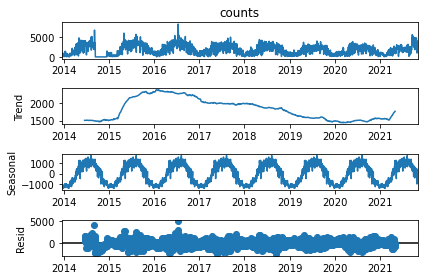

In [41]:
res = sm.tsa.seasonal_decompose(dailyDataBrooklyn.counts,model='additive',freq=365)
res.plot()
plt.show()

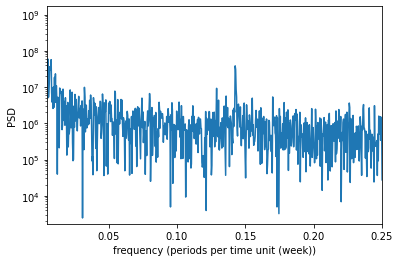

Strongest period length = 179.625


In [42]:
f, PSD = scipy.signal.periodogram(dailyDataBrooklyn.counts)
plt.semilogy(f, PSD)
plt.xlabel('frequency (periods per time unit (week))')
plt.ylabel('PSD')
plt.xlim(0.005,0.25) #show frequencies within 1/4..1/200, periods of 4-200 weeks
plt.ylim(max(PSD)/1e6,max(PSD)) #show strength up to 1e-6 of the max
#filter outputs - periods shorter than 4 years (approx 200 weeks)
PSD = PSD[f>0.005]
f = f[f>0.005]
plt.show()
print('Strongest period length = {}'.format(1/f[np.argmax(PSD)])) #report the length of the strongest period
#transformting the frequency into the period length, using 1=frequency (number of periods)*period length

In [56]:
BeforeBrooklynLane = dailyDataBrooklyn.iloc[2478:2509].reset_index()
AfterBrooklynLane = dailyDataBrooklyn.iloc[2843:].reset_index()


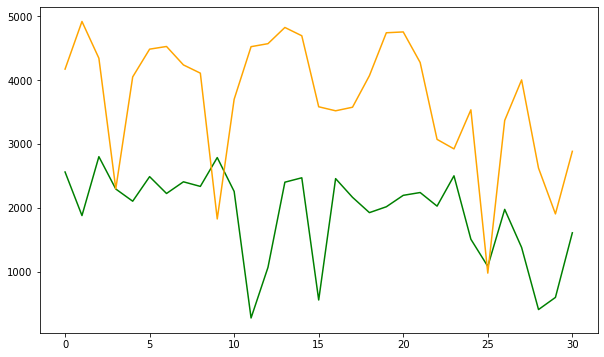

In [68]:
plt.figure(figsize = (10,6))
#plt.plot(BeforeWilliamsburgLane.index,BeforeWilliamsburgLane.counts, label = 'BeforeWilliamsburgLane count', color = 'blue')
plt.plot(BeforeBrooklynLane.index,BeforeBrooklynLane.counts.rolling(window = 1).mean(), label = 'BeforeBrooklynLane count', color = 'green')
#plt.plot(AfterWilliamsburgLane.index,AfterWilliamsburgLane.counts, label = 'BeforeWilliamsburgLane count', color = 'red')
plt.plot(AfterBrooklynLane.index,AfterBrooklynLane.counts.rolling(window = 1).mean(), label = 'AfterBrooklynLane count', color = 'orange')

In [62]:
percentChangeBrooklyn = 100*(AfterBrooklynLane.counts.mean()-BeforeBrooklynLane.counts.mean())/BeforeBrooklynLane.counts.mean()

In [63]:
percentChangeBrooklyn

95.24601289446895

In [64]:
BeforeBrooklynLane.counts.mean()

1901.2903225806451

In [65]:
AfterBrooklynLane.counts.mean()

3712.1935483870966

,date,counts
0,2020-10-01,2560.0
1,2020-10-02,1877.0
2,2020-10-03,2800.0
3,2020-10-04,2293.0
4,2020-10-05,2102.0
5,2020-10-06,2487.0
6,2020-10-07,2223.0
7,2020-10-08,2406.0
8,2020-10-09,2334.0
9,2020-10-10,2786.0
